d:\python37\lib\site-packages\ipykernel_launcher.py:188: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


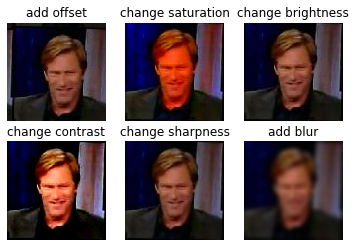

In [20]:
import os
import re
import numpy as np
import cv2
from ipynb.fs.full.config import getItem_int, getItem_string
from PIL import Image, ImageEnhance, ImageOps, ImageFile,ImageChops,ImageFilter
import numpy.lib.format as fmt
import shutil
import random
import math
import matplotlib.pyplot as plt

#load image
def loadImage(imagePath):
    images = []
    labels = []
    # if the path is exist
    if os.path.exists(imagePath):
        # get all directories in the imagePath
        directory = os.listdir(imagePath)
        for subdirectory in directory:
            subdirectories = os.path.join(imagePath, subdirectory)
            for face_image in os.listdir(subdirectories):
                imgPath = os.path.join(subdirectories, face_image)
                #                     print(imgPath)
                # if it is an image
                if face_image.endswith(".jpg"):
                    image = cv2.imread(imgPath)
                    images.append(image)
                    labels.append(subdirectory)
        print("images are loaded!")
    #         print("images: ",len(images))
    #         print("labels: ",len(labels))
    #         print(labels)
    else:
        print("imagePath is invalid: ", imagePath)
    return images, labels

#resize images
def resize_images(imagePath, savePath, x, y):
    # if the path is exist
    if os.path.exists(imagePath):
        # get all directories in the imagePath
        directory = os.listdir(imagePath)
        for nameSubdirectory in directory:
            nameSubdirectories = os.path.join(imagePath, nameSubdirectory)
            for image in os.listdir(nameSubdirectories):
                imgPath = os.path.join(nameSubdirectories, image)
#                 print(imgPath)
                # if it is a file
                if os.path.isfile(imgPath):
                    getImage = Image.open(imgPath)
                    # resize images
                    imageAr = np.asarray(getImage.resize((x, y)))
                    resized_image = Image.fromarray(imageAr)
                    # if output directory doesnt exist, make it
                    if not os.path.exists(savePath + "/" + nameSubdirectory):
                        os.makedirs(savePath + "/" + nameSubdirectory)
                    # get original image name
                    m = re.search(r"[^\\]+$", imgPath)
#                     print(savePath + "/" + nameSubdirectory + "/" + m.group(0))
                    resized_image.save(
                        savePath + "/" + nameSubdirectory + "/" + m.group(0), "jpeg"
                    )
        print("done!")
    else:
        print("imagePath is invalid: ", imagePath)
  
    #generate training set
def generate_train_set(setSize=0.7):
    train_images = []
    train_labels = []
    # if the path is exist
    imagePath=getItem_string("dataset","test_dataset_path")
    if os.path.exists(imagePath):
        # get all directories in the imagePath
        directory = os.listdir(imagePath)
        for subdirectory in range(len(directory)):
            subdirectories = os.path.join(imagePath, directory[subdirectory])
            numberOfImage=len(os.listdir(subdirectories))
            numberOfImage*=setSize
            listImages=os.listdir(subdirectories)
            for i in range(int(numberOfImage)):     
                imgPath = os.path.join(subdirectories, listImages[i])
                if listImages[i].endswith(".jpg"):
                    image = cv2.imread(imgPath)
                    train_images.append(image)
                    train_labels.append(directory[subdirectory])
        print("train_images:",len(train_images))
        print("train_labels:",len(train_labels))
        print("training set done!")
    else:
        print("imagePath is invalid: ")
    return train_images,train_labels

#generate test set
def generate_test_set(setSize=0.7):
    test_images = []
    test_labels = []
    # if the path is exist
    imagePath=getItem_string("dataset","test_dataset_path")
    if os.path.exists(imagePath):
        # get all directories in the imagePath
        directory = os.listdir(imagePath)
        for subdirectory in range(len(directory)):
            subdirectories = os.path.join(imagePath, directory[subdirectory])
            numberOfImage=len(os.listdir(subdirectories))
            numberOfImage*=setSize
            listImages=os.listdir(subdirectories)
            for i in range(int(numberOfImage)+1,len(os.listdir(subdirectories))):     
                imgPath = os.path.join(subdirectories, listImages[i])
                if listImages[i].endswith(".jpg"):
                    image = cv2.imread(imgPath)
                    test_images.append(image)
                    test_labels.append(directory[subdirectory])
        print("test_images:",len(test_images))
        print("test_labels",len(test_labels))
        print("test set done!")
    else:
        print("imagePath is invalid: ")
    return test_images,test_labels

#how many image for one person
def numOfImgOfOne(imagePath):
    images = []
    labels = []
    dirtionary={}
    # if the path is exist
    if os.path.exists(imagePath):
        # get all directories in the imagePath
        directory = os.listdir(imagePath)
        for subdirectory in directory:
            subdirectories = os.path.join(imagePath, subdirectory)
            dirtionary.update({subdirectory:len(os.listdir(subdirectories))})
    else:
        print("imagePath is invalid: ", imagePath)
    return dirtionary

#show variations of images on the console
def showImagesWithVariations(img):   
    offsetImg=None
    saturationImg=None
    brightnessImg=None
    contrastImg=None
    sharpImg=None
    blurImg=None
    img = Image.open(img, mode="r")
    width = img.size[0]
    height = img.size[1]      
    #offset
    random_xoffset = np.random.randint(0, math.ceil(img.size[0]*0.2))
    random_yoffset = np.random.randint(0, math.ceil(img.size[1]*0.2))
    offsetImg = ImageChops.offset(img,xoffset = random_xoffset, yoffset = random_yoffset)
    #saturation
    rand = np.random.randint(0, 30) / 10.         
    saturationImg = ImageEnhance.Color(img).enhance(rand) 
    #brightness
    rand = np.random.randint(10, 20) / 10.  
    brightnessImg = ImageEnhance.Brightness(img).enhance(rand) 
    #contrast
    rand = np.random.randint(10, 20) / 10. 
    contrastImg = ImageEnhance.Contrast(img).enhance(rand) 
    #sharp
    rand = np.random.randint(0, 30) / 10.  
    sharpImg = ImageEnhance.Sharpness(img).enhance(rand) 
    #gaussian blur
    blurImg = img.filter(ImageFilter.GaussianBlur(2))

    fig,ax = plt.subplots(2,3)
    ax[0][0].imshow(offsetImg)
    ax[0][0].axis('off')
    ax[0][0].set_title("add offset")
    ax[0][1].imshow(saturationImg)
    ax[0][1].axis('off')
    ax[0][1].set_title("change saturation")
    ax[0][2].imshow(brightnessImg)
    ax[0][2].axis('off')
    ax[0][2].set_title("change brightness")
    ax[1][0].imshow(contrastImg)
    ax[1][0].axis('off')
    ax[1][0].set_title("change contrast")
    ax[1][1].imshow(sharpImg)
    ax[1][1].axis('off')
    ax[1][1].set_title("change sharpness")
    ax[1][2].imshow(blurImg)
    ax[1][2].axis('off')
    ax[1][2].set_title("add blur")
    fig.show() 
   

#add varition
def addVariation(img,overlying):
    outputImg=""
    img = Image.open(img, mode="r")
    width = img.size[0]
    height = img.size[1]
   
    for i in range(overlying):
        option = random.randint(1,6)
        if option==1:          
            #offset
            random_xoffset = np.random.randint(0, math.ceil(img.size[0]*0.2))
            random_yoffset = np.random.randint(0, math.ceil(img.size[1]*0.2))
            outputImg = ImageChops.offset(img,xoffset = random_xoffset, yoffset = random_yoffset)
        elif option==2:
            #saturation
            rand = np.random.randint(0, 30) / 10.         
            outputImg = ImageEnhance.Color(img).enhance(rand) 
        elif option==3:
            #brightness
            rand = np.random.randint(10, 20) / 10.  
            outputImg = ImageEnhance.Brightness(img).enhance(rand) 
        elif option==4:
            #contrast
            rand = np.random.randint(10, 20) / 10. 
            outputImg = ImageEnhance.Contrast(img).enhance(rand) 
        elif option==5:
            #sharp
            rand = np.random.randint(0, 30) / 10.  
            outputImg = ImageEnhance.Sharpness(img).enhance(rand) 
        elif option==6:
            #gaussian blur
            outputImg = img.filter(ImageFilter.GaussianBlur(2))
    return outputImg
  
#add variations to each person
def balanceDataset(imagePath,number):
    count=0
    images = []
    labels = []
    # if the path is exist
    if os.path.exists(imagePath):
        # get all directories in the imagePath
        directory = os.listdir(imagePath)
        for subdirectory in directory:
            subdirectories = os.path.join(imagePath, subdirectory)
            while (len(os.listdir(subdirectories))<number): 
                imgs = os.listdir(subdirectories)
                i = random.randint(0,len(os.listdir(subdirectories))-1)
                i = imgs[i]
                newImg = addVariation(subdirectories+'/'+i,random.randint(1,3))
                if validVariations(newImg):
                    newImg.save(subdirectories + '/' +subdirectory+'_'+ str(random.randint(0,9000)) + '.jpg')
                if len(os.listdir(subdirectories))>number:
                    break
            while (len(os.listdir(subdirectories))>number): 
                imgs = os.listdir(subdirectories)
                i = random.randint(0,len(os.listdir(subdirectories))-1)
                i = imgs[i]
                if(os.path.exists(subdirectories+'/'+i)):
                    os.remove(subdirectories+'/'+i)
                if len(os.listdir(subdirectories))<number+1:
                    break
                
            print(count)
            count+=1
                        
                
    else:
        print("imagePath is invalid: ", imagePath)
    print("done")

#if opencv detector can detect a face, then it is valid
def validVariations(img):
    img = np.array(img)
    grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #create a cascade classifier
    face_cascade = cv2.CascadeClassifier(getItem_string("opencv","cascadeclassifier")  )                
    #detect faces 
    faces = face_cascade.detectMultiScale(grayscale_image,scaleFactor = 1.2,minNeighbors = 3)  
    if len(faces) > 0:
        return True
    return False
    
#remove any variation except original images
def removeVariations(imagePath):
     # if the path is exist
    if os.path.exists(imagePath):
        # get all directories in the imagePath
        directory = os.listdir(imagePath)
        for nameSubdirectory in directory:
            nameSubdirectories = os.path.join(imagePath, nameSubdirectory)
            for image in os.listdir(nameSubdirectories):
                imgPath = os.path.join(nameSubdirectories, image)
#                 print(imgPath)
                # if it is a file
                if os.path.isfile(imgPath):
                    m = re.search(r"[^\\]+$", imgPath)
                    if(m.group(0).startswith(nameSubdirectory)):
                        os.remove(imgPath)
        print("done!")
    else:
        print("imagePath is invalid: ", imagePath)

import scipy.misc        
def loadImagesFromInternet(name,imgPath,output):
    count=0
    directory = os.listdir(imgPath) 
    for i in  directory:
        path = os.path.join(imgPath, i)
        grayscale_image = cv2.imread(path,cv2.COLOR_BGR2GRAY)
        print(i)
        print(count)
        count+=1
        #create a cascade classifier
        face_cascade = cv2.CascadeClassifier(getItem_string("opencv","cascadeclassifier")  )                
        #detect faces 
        faces = face_cascade.detectMultiScale(grayscale_image)  
        image=None
        for face in faces: 
            count+=1
            x, y, w, h = face
            image = grayscale_image[y - 10: y + h + 10, x - 10: x + w + 10]
        # resize images
            resized_image = cv2.resize(image,(100,100))   
            print(type(resized_image))
            if not os.path.exists(output + "/"+name):
                os.makedirs(output + "/"+name)
            
            resized_image = image.reshape((1, 100, 100, 3))      
#             scipy.misc.imsave(output + "/"+name+"/" +name+str(randm.randint(0,9999))+".jpeg", resized_image)
            resized_image.save(
                output + "/"+name+"/" +name+str(randm.randint(0,9999))+".jpeg", "jpeg"
            )
            
        
# if __name__ == "__main__":
#     removeVariations("small_face_dataset")
#     loadImagesFromInternet("Aaron_Eckhart","C:/Users/thyx/Desktop/Aaron_Eckhart_old","C:/Users/thyx/Desktop")
#     balanceDataset("small_face_dataset",1500)
    #add or remove images for each one in dataset, keep 700 images each 
#     balanceDataset(getItem_string("dataset","dataset_path"))

# img =  addVariation("C:/Users/thyx/Desktop/original.jpg",1)
# img.save("C:/Users/thyx/Desktop/"+str(1) + '.jpg')

# balanceDataset(getItem_string("dataset","test_dataset_path"))

# resize_images("small_face_dataset", "new_small_face_dataset", 150, 150)
